# 4. Đặt câu hỏi và trả lời

In [1]:
#import các thứ viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#đọc file csv
df = pd.read_csv('data/mxmh_survey_results_clean.csv')

### Câu 1: Những người có mức độ bệnh tâm lý nặng thường có thói quen nghe nhạc như thế nào? Và việc này có giúp cải thiện tâm lý của họ không?

- Ở đây chúng ta xét mực độ nặng sẽ từ 6 - 10 

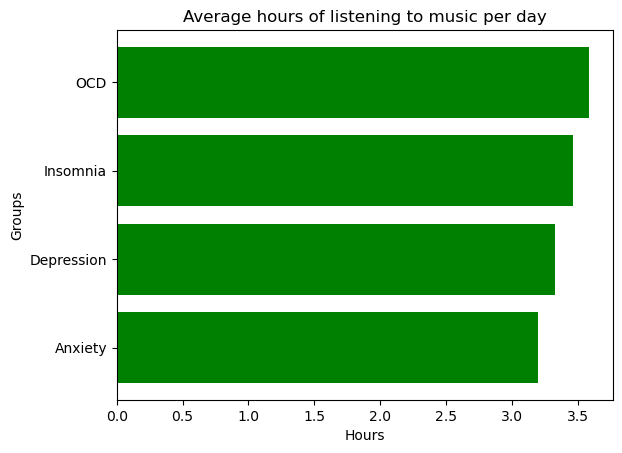

In [3]:
df_anxiety = df[df['Anxiety'] > 5]
df_depression = df[df['Depression'] > 5]
df_insomnia = df[df['Insomnia'] > 5]
df_ocd = df[df['OCD'] > 5]

# vẽ biểu đồ cột số giờ nghe nhạc mỗi ngày của từng nhóm người trên
avg_hours_anxiety = df_anxiety['Hours per day'].mean()
avg_hours_depression = df_depression['Hours per day'].mean()
avg_hours_insomnia = df_insomnia['Hours per day'].mean()
avg_hours_ocd = df_ocd['Hours per day'].mean()

groups = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
avg_hours = [avg_hours_anxiety, avg_hours_depression, avg_hours_insomnia, avg_hours_ocd]

plt.barh(groups, avg_hours, color = 'green')
plt.title('Average hours of listening to music per day')
plt.xlabel('Hours')
plt.ylabel('Groups')
plt.show()

In [4]:
print('Trung bình số giờ nghe nhạc của một người trong bài khảo sát là: ', df['Hours per day'].mean(), 'giờ')

Trung bình số giờ nghe nhạc của một người trong bài khảo sát là:  3.0687786259541983 giờ


- Có thể thấy trung bình số giờ nghe nhạc trong ngày của các nhóm người này cao hơn so với trung bình của tất cả mọi người

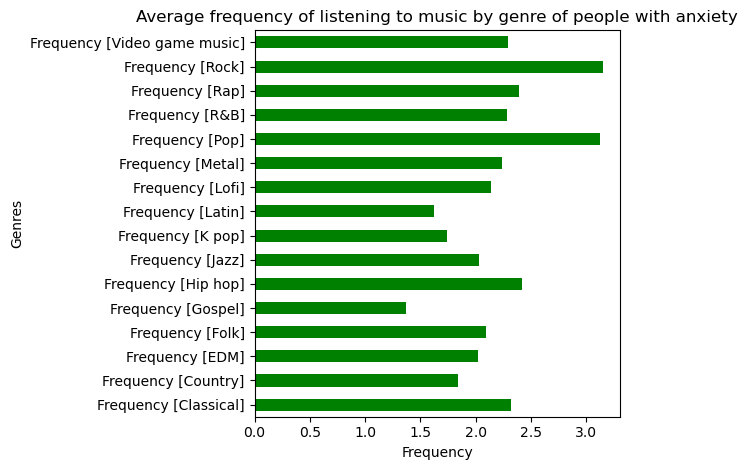

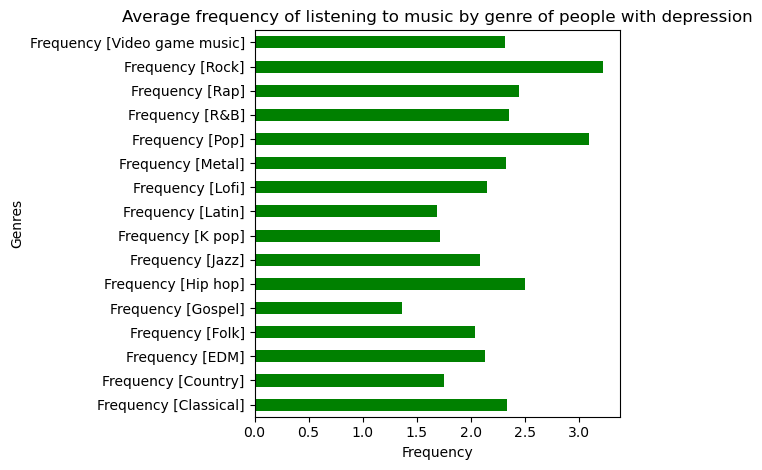

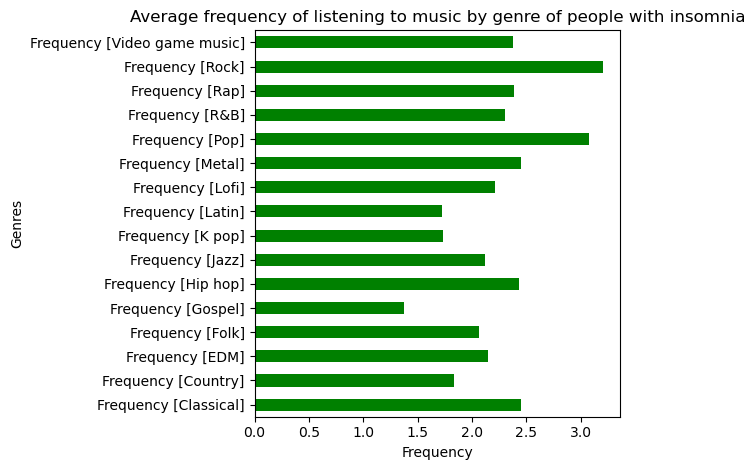

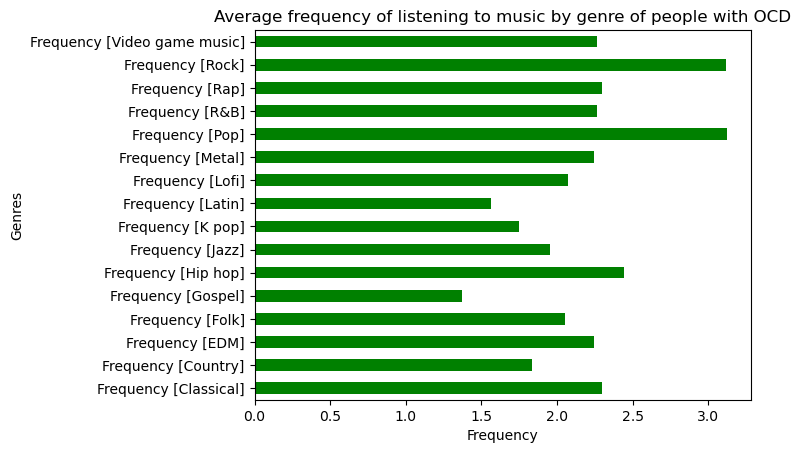

In [8]:
#Vẽ biểu đồ frequency [gernes] của từng nhóm người trên
# plt, ax = plt.subplots(4, 1, figsize = (10, 10))
#Anxiety
df_anxiety_genres = df_anxiety.filter(like = 'Frequency')
avg_anxiety_genres = df_anxiety_genres.mean()
avg_anxiety_genres.plot(kind = 'barh', color = 'green')
plt.title('Average frequency of listening to music by genre of people with anxiety')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()
#Depression
df_depression_genres = df_depression.filter(like = 'Frequency')
avg_depression_genres = df_depression_genres.mean()
avg_depression_genres.plot(kind = 'barh', color = 'green')
plt.title('Average frequency of listening to music by genre of people with depression')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()
#Insomnia
df_insomnia_genres = df_insomnia.filter(like = 'Frequency')
avg_insomnia_genres = df_insomnia_genres.mean()
avg_insomnia_genres.plot(kind = 'barh', color = 'green')
plt.title('Average frequency of listening to music by genre of people with insomnia')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()
#OCD
df_ocd_genres = df_ocd.filter(like = 'Frequency')
avg_ocd_genres = df_ocd_genres.mean()
avg_ocd_genres.plot(kind = 'barh', color = 'green')
plt.title('Average frequency of listening to music by genre of people with OCD')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()

- Việc nghe nhạc như thế này có giúp cải thiện tinh thần của họ không

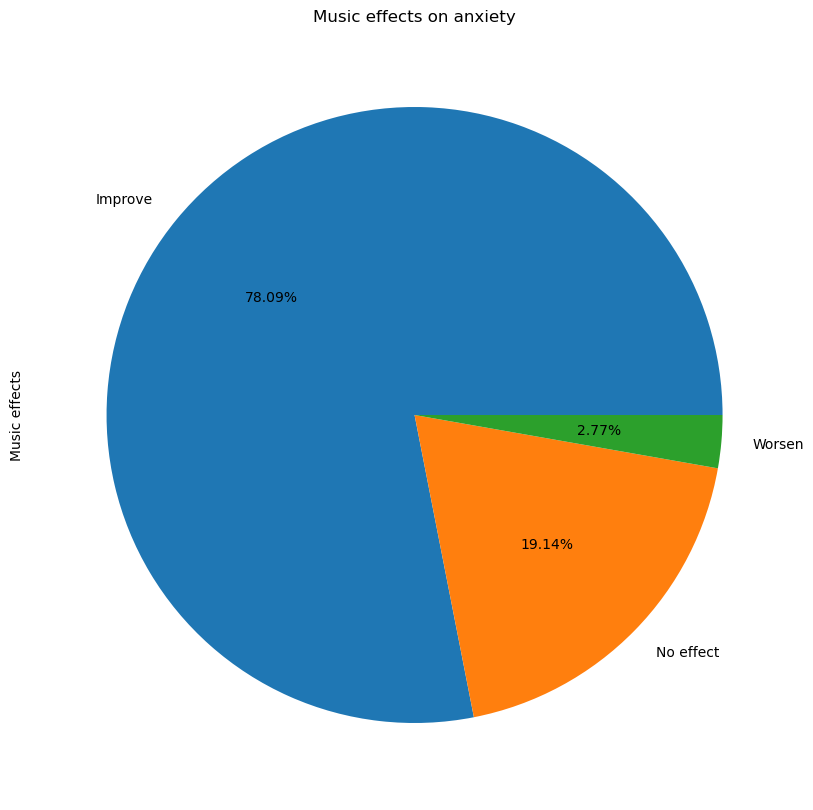

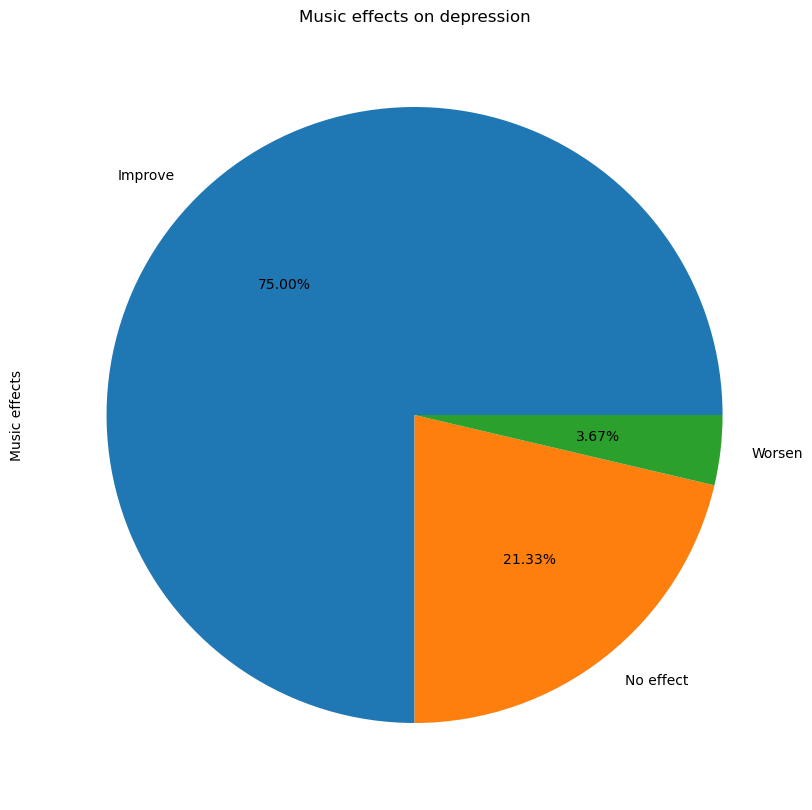

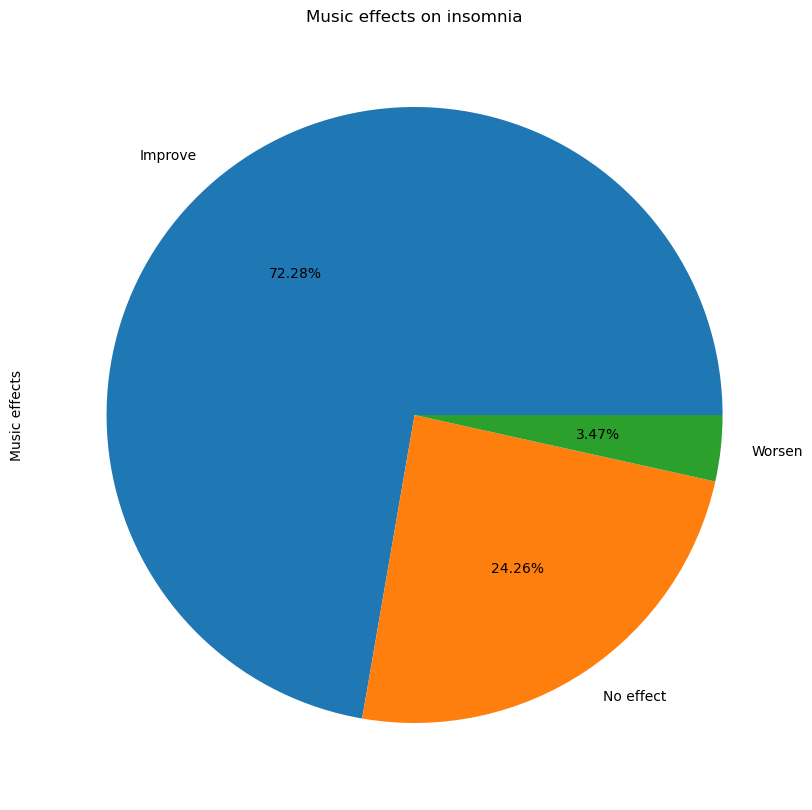

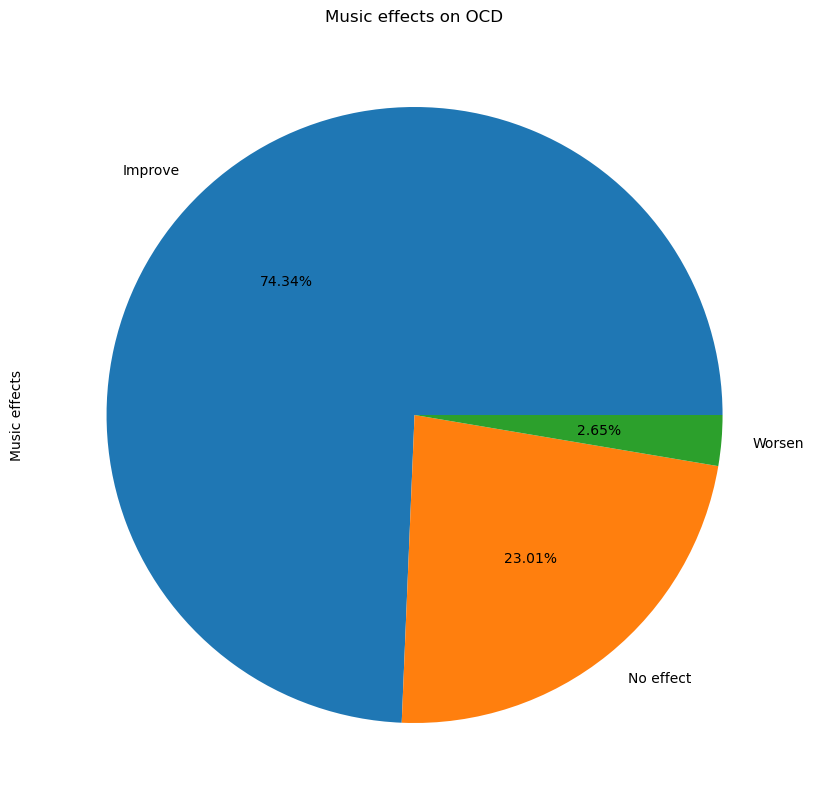

In [9]:
df_axiety_effect = df_anxiety['Music effects'].value_counts()
df_depression_effect = df_depression['Music effects'].value_counts()
df_insomnia_effect = df_insomnia['Music effects'].value_counts()
df_ocd_effect = df_ocd['Music effects'].value_counts()
#vẽ biểu đồ tròn tác động của nhạc đến tâm trạng của từng nhóm người trên
#Anxiety
df_axiety_effect.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10, 10))
plt.title('Music effects on anxiety')
plt.show()
#Depression
df_depression_effect.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10, 10))
plt.title('Music effects on depression')
plt.show()
#Insomnia
df_insomnia_effect.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10, 10))
plt.title('Music effects on insomnia')
plt.show()
#OCD
df_ocd_effect.plot(kind = 'pie', autopct = '%.2f%%', figsize = (10, 10))
plt.title('Music effects on OCD')
plt.show()


### Câu 2: 